# Team Mini Project 4: Writing SQL Queries
## Team: TheDataKnights
## Team Members: Nicholas Romano,  Michael Zelaya
## DS450-01
## Data Science Senior Capstone
---

### Importing Libraries

In [1]:
#Data manipulation and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#MySQL libraries
import pymysql

### Setting Up Connection to Database

The database password and database lines of code were ran with the correct password, then the database password was changed to an empty string to hide the password with this notebook is pushed to github

In [4]:
DatabasePassword = ""

In [3]:
database = pymysql.connect(
    host = "localhost",
    user = "root",
    password = DatabasePassword,
    database = "sakila"
)

### SQL Queries

#### Query 1 - Number of Films by Category
***Goal:** Create a horizontal bar chart that shows all the film categories and how many films fall in that category. The bar chart should be sorted so the largest film category is at the top and the smallest is at the botom.*  

**Query Used:**  
SELECT category.name AS category, COUNT(film_category.film_id) AS num_films  
FROM category  
JOIN film_category ON film_category.category_id = category.category_id   
GROUP BY category.name   
ORDER BY num_films DESC;

In [5]:
cursor = database.cursor()
cursor.execute("SELECT category.name AS category, COUNT(film_category.film_id) AS num_films \
FROM category \
JOIN film_category ON film_category.category_id = category.category_id \
GROUP BY category.name \
ORDER BY num_films DESC")
result1 = cursor.fetchall()
print(result1)
cursor.close()

(('Sports', 74), ('Foreign', 73), ('Family', 69), ('Documentary', 68), ('Animation', 66), ('Action', 64), ('New', 63), ('Drama', 62), ('Games', 61), ('Sci-Fi', 61), ('Children', 60), ('Comedy', 58), ('Classics', 57), ('Travel', 57), ('Horror', 56), ('Music', 51))


In [6]:
df_filmCategory = pd.DataFrame(result1)
df_filmCategory.rename({0:"category", 1:"num_films"}, axis = 1, inplace = True)
df_filmCategory

,category,num_films
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Games,61
9,Sci-Fi,61


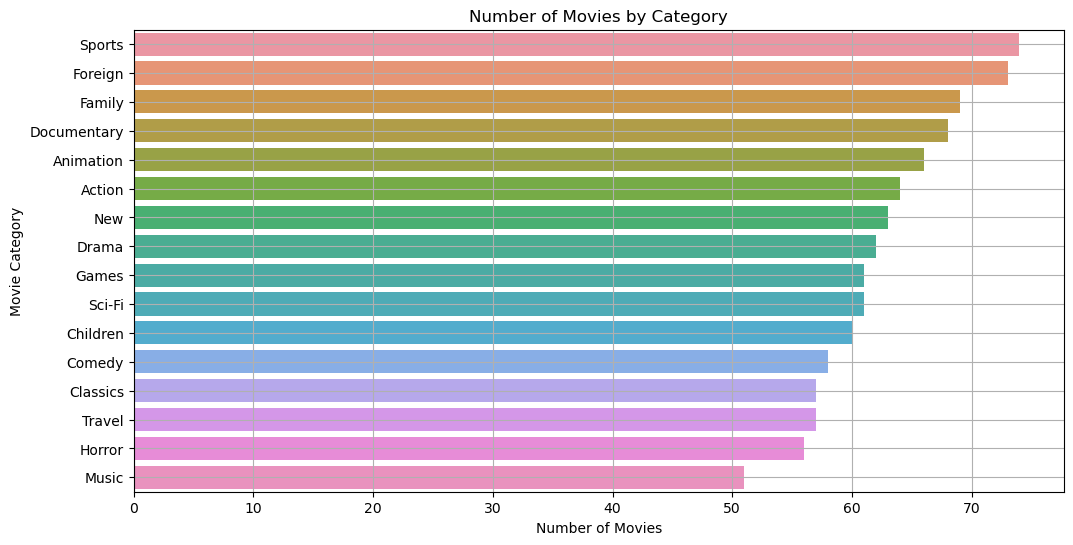

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(y="category", x="num_films", data=df_filmCategory, orient = 'h')
plt.title("Number of Movies by Category")
plt.xlabel("Number of Movies")
plt.ylabel("Movie Category")
plt.grid(True)
plt.savefig("MovieCategoryCounts.jpeg")

---
#### Query 2 - Country City Count

***Goal:** Create a horizontal bar chart that shows the top ten countries by city count. The bar chart should be sorted so the country with the largest number of cities is at the top and the country with the smallest number of cities is at the botom.*

**Query Used:**  
SELECT country, COUNT(city.city_id) as num_cities  
FROM country  
JOIN city ON city.country_id = country.country_id  
GROUP BY country.country_id   
ORDER BY num_cities DESC  
LIMIT 10

In [8]:
cursor = database.cursor()
cursor.execute("SELECT country, COUNT(city.city_id) AS num_cities \
FROM country JOIN city ON city.country_id = country.country_id \
GROUP BY country.country_id \
ORDER BY num_cities DESC \
LIMIT 10")
result2 = cursor.fetchall()
print(result2)
cursor.close()

(('India', 60), ('China', 53), ('United States', 35), ('Japan', 31), ('Mexico', 30), ('Russian Federation', 28), ('Brazil', 28), ('Philippines', 20), ('Turkey', 15), ('Indonesia', 14))


In [9]:
df_country_city_count = pd.DataFrame(result2)
df_country_city_count.rename({0:"country", 1:"num_cities"}, axis = 1, inplace = True)
df_country_city_count

,country,num_cities
0,India,60
1,China,53
2,United States,35
3,Japan,31
4,Mexico,30
5,Russian Federation,28
6,Brazil,28
7,Philippines,20
8,Turkey,15
9,Indonesia,14


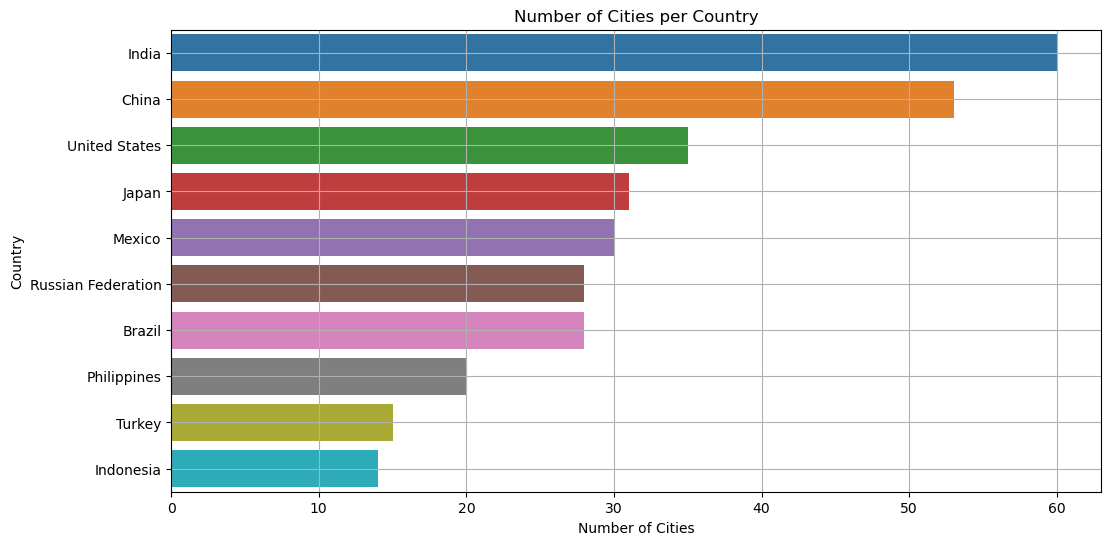

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(y="country", x="num_cities", data=df_country_city_count, orient = 'h')
plt.title("Number of Cities per Country")
plt.xlabel("Number of Cities")
plt.ylabel("Country")
plt.grid(True)
plt.savefig("TopCityCount_Country.jpeg")

---
#### Query 3 - Film Actor Count

***Goal:** Create a horizontal bar chart that shows the top ten films by actor count. The bar chart should be sorted so the film with the largest number of actors is at the top and the film with the smallest number of actors is at the botom.*

**Query Used:**  
SELECT film.title as film, count(film_actor.actor_id) as num_actors   
FROM film   
JOIN film_actor ON film.film_id = film_actor.film_id  
GROUP BY film.film_id  
ORDER BY num_actors DESC  
LIMIT 10;

In [11]:
cursor = database.cursor()
cursor.execute("SELECT film.title AS film, count(film_actor.actor_id) AS num_actors \
FROM film \
JOIN film_actor ON film.film_id = film_actor.film_id \
GROUP BY film.film_id \
ORDER BY num_actors DESC \
LIMIT 10")
result3 = cursor.fetchall()
print(result3)
cursor.close()

(('LAMBS CINCINATTI', 15), ('CHITTY LOCK', 13), ('CRAZY HOME', 13), ('RANDOM GO', 13), ('DRACULA CRYSTAL', 13), ('BOONDOCK BALLROOM', 13), ('MUMMY CREATURES', 13), ('HELLFIGHTERS SIERRA', 12), ('LONELY ELEPHANT', 12), ('ARABIA DOGMA', 12))


In [12]:
df_film_actor_count = pd.DataFrame(result3)
df_film_actor_count.rename({0:"film", 1:"num_actors"}, axis = 1, inplace = True)
df_film_actor_count

,film,num_actors
0,LAMBS CINCINATTI,15
1,CHITTY LOCK,13
2,CRAZY HOME,13
3,RANDOM GO,13
4,DRACULA CRYSTAL,13
5,BOONDOCK BALLROOM,13
6,MUMMY CREATURES,13
7,HELLFIGHTERS SIERRA,12
8,LONELY ELEPHANT,12
9,ARABIA DOGMA,12


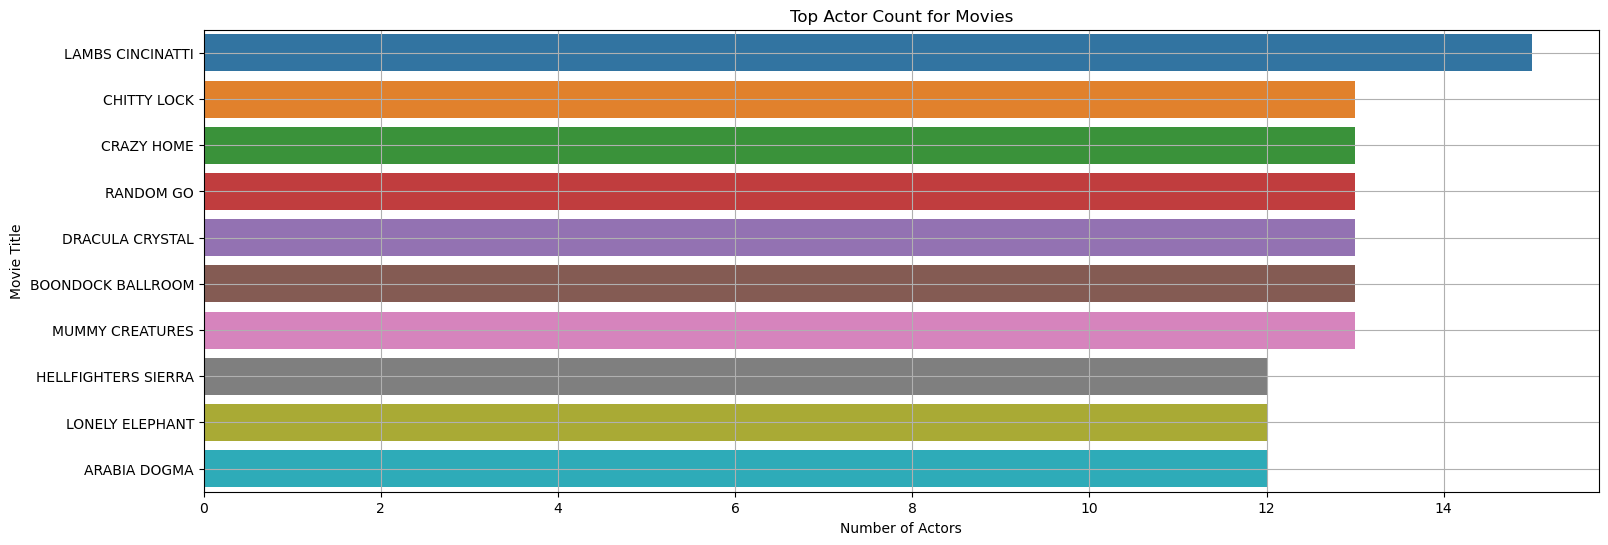

In [13]:
plt.figure(figsize=(18,6))
sns.barplot(y="film", x="num_actors", data=df_film_actor_count, orient = 'h')
plt.title("Top Actor Count for Movies")
plt.xlabel("Number of Actors")
plt.ylabel("Movie Title")
plt.grid(True)
plt.savefig("TopActorCount_Movies.jpeg")

---
#### Query 4 - Top Ten Countries by Rentals

***Goal:** Create a horizontal bar chart that shows the top ten countries by total number of rentals. The bar chart should be sorted so the country with the largest number of rentals is at the top and the country with the smallest number of rentals is at the botom.*

**Query Used**  
SELECT country.country, COUNT(rental.rental_id) as num_rentals  
FROM rental   
JOIN customer ON rental.customer_id = customer.customer_id  
JOIN address ON customer.address_id = address.address_id  
JOIN city ON address.city_id = city.city_id  
JOIN country ON city.country_id = country.country_id   
GROUP BY country.country   
ORDER BY num_rentals DESC  
LIMIT 10;

In [14]:
cursor = database.cursor()
cursor.execute("SELECT country.country, \
COUNT(rental.rental_id) AS num_rentals \
FROM rental JOIN customer ON rental.customer_id = customer.customer_id \
JOIN address ON customer.address_id = address.address_id \
JOIN city ON address.city_id = city.city_id \
JOIN country ON city.country_id = country.country_id \
GROUP BY country.country \
ORDER BY num_rentals DESC \
LIMIT 10;")
result4 = cursor.fetchall()
print(result4)
cursor.close()

(('India', 1572), ('China', 1426), ('United States', 968), ('Japan', 825), ('Mexico', 796), ('Brazil', 748), ('Russian Federation', 713), ('Philippines', 568), ('Turkey', 388), ('Indonesia', 367))


In [15]:
df_country_rentals = pd.DataFrame(result4)
df_country_rentals.rename({0:"country", 1:"num_rentals"}, axis = 1, inplace = True)
df_country_rentals

,country,num_rentals
0,India,1572
1,China,1426
2,United States,968
3,Japan,825
4,Mexico,796
5,Brazil,748
6,Russian Federation,713
7,Philippines,568
8,Turkey,388
9,Indonesia,367


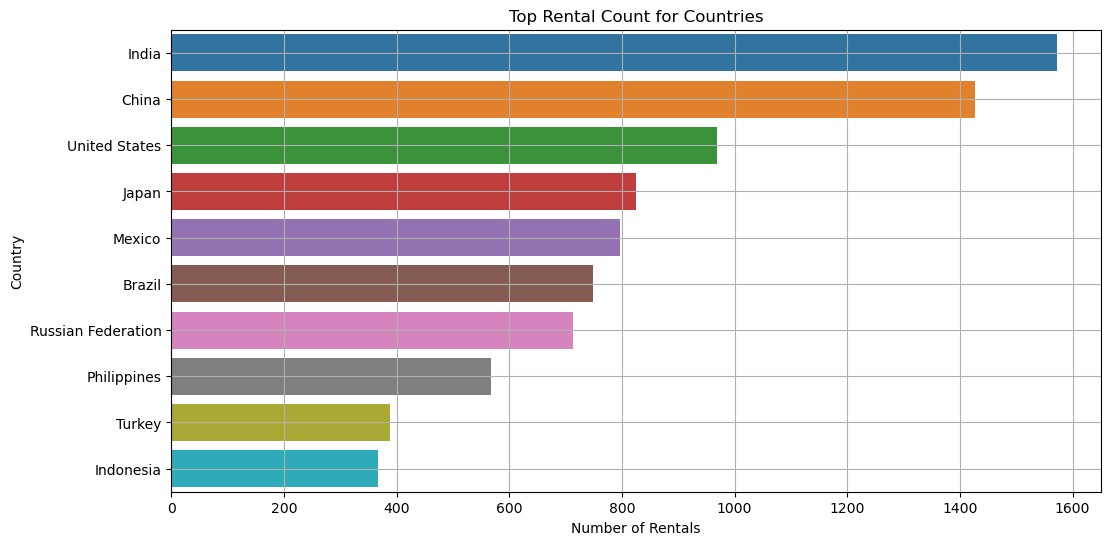

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(y="country", x="num_rentals", data=df_country_rentals, orient = 'h')
plt.title("Top Rental Count for Countries")
plt.xlabel("Number of Rentals")
plt.ylabel("Country")
plt.grid(True)
plt.savefig("TopRentalCounts.jpeg")

---
#### Query 5 - Top Ten Countries by Money Spent

***Goal:** Create a horizontal bar chart that shows the top ten countries by total amount of money spent. The bar chart should be sorted so the country with the largest amount of money spent is at the top and the country with the smallest amount of money spent is at the botom.*

**Query Used**  
SELECT country.country, SUM(payment.amount) as total_spent  
FROM customer  
JOIN payment ON customer.customer_id = payment.customer_id  
JOIN address ON customer.address_id = address.address_id  
JOIN city ON address.city_id = city.city_id  
JOIN country ON city.country_id = country.country_id   
GROUP BY country.country  
ORDER BY total_spent DESC  
LIMIT 10; 

In [17]:
cursor = database.cursor()
cursor.execute("SELECT country.country, SUM(payment.amount) AS total_spent \
FROM customer \
JOIN payment ON customer.customer_id = payment.customer_id \
JOIN address ON customer.address_id = address.address_id \
JOIN city ON address.city_id = city.city_id \
JOIN country ON city.country_id = country.country_id \
GROUP BY country.country \
ORDER BY total_spent DESC \
LIMIT 10;")
result5 = cursor.fetchall()
print(result5)
cursor.close()

(('India', Decimal('6628.28')), ('China', Decimal('5798.74')), ('United States', Decimal('4110.32')), ('Japan', Decimal('3470.75')), ('Mexico', Decimal('3307.04')), ('Brazil', Decimal('3200.52')), ('Russian Federation', Decimal('3045.87')), ('Philippines', Decimal('2381.32')), ('Turkey', Decimal('1662.12')), ('Nigeria', Decimal('1511.48')))


In [18]:
df_country_spending = pd.DataFrame(result5)
df_country_spending.rename({0:"country", 1:"total_spent"}, axis = 1, inplace = True)
df_country_spending

,country,total_spent
0,India,6628.28
1,China,5798.74
2,United States,4110.32
3,Japan,3470.75
4,Mexico,3307.04
5,Brazil,3200.52
6,Russian Federation,3045.87
7,Philippines,2381.32
8,Turkey,1662.12
9,Nigeria,1511.48


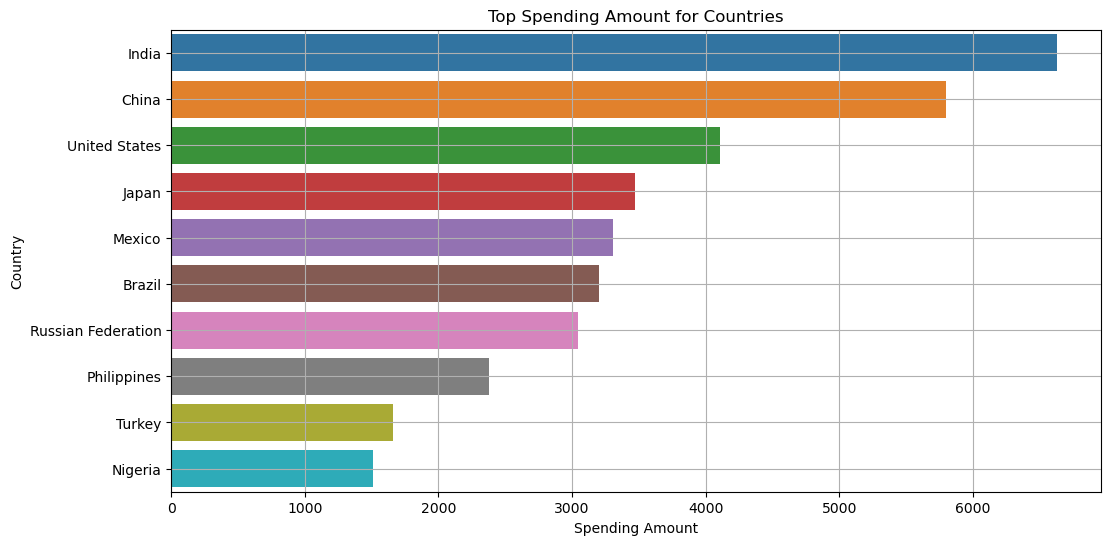

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(y="country", x="total_spent", data=df_country_spending, orient = 'h')
plt.title("Top Spending Amount for Countries")
plt.xlabel("Spending Amount")
plt.ylabel("Country")
plt.grid(True)
plt.savefig("CountryTotalSpending_Barchart.jpeg")

---
#### Query 6 - Countries Money Spent Against Total Rentals Scatter Plot

***Goal:** Create a scater plot comparing the number of rentals on the X axis and the amount of money spent on the Y axis.*

**Query Used**  
SELECT customer.customer_id, SUM(payment.amount) as total_spent, COUNT(payment.rental_id)  
FROM customer  
JOIN payment ON customer.customer_id = payment.customer_id  
JOIN address ON customer.address_id = address.address_id  
JOIN city ON address.city_id = city.city_id   
JOIN country ON city.country_id = country.country_id   
GROUP BY customer.customer_id  
ORDER BY total_spent DESC

In [20]:
cursor = database.cursor()
cursor.execute("SELECT customer.customer_id, SUM(payment.amount) as total_spent, COUNT(payment.rental_id)\
FROM customer \
JOIN payment ON customer.customer_id = payment.customer_id \
JOIN address ON customer.address_id = address.address_id \
JOIN city ON address.city_id = city.city_id \
JOIN country ON city.country_id = country.country_id \
GROUP BY customer.customer_id \
ORDER BY total_spent DESC")
result6 = cursor.fetchall()
print(result6)
cursor.close()
database.close()

((526, Decimal('221.55'), 45), (148, Decimal('216.54'), 46), (144, Decimal('195.58'), 42), (178, Decimal('194.61'), 39), (137, Decimal('194.61'), 39), (459, Decimal('186.62'), 38), (469, Decimal('177.60'), 40), (468, Decimal('175.61'), 39), (236, Decimal('175.58'), 42), (181, Decimal('174.66'), 34), (176, Decimal('173.63'), 37), (50, Decimal('169.65'), 35), (259, Decimal('168.68'), 32), (522, Decimal('167.67'), 33), (410, Decimal('167.62'), 38), (403, Decimal('166.65'), 35), (295, Decimal('162.62'), 38), (209, Decimal('161.68'), 32), (373, Decimal('161.65'), 35), (470, Decimal('160.68'), 32), (187, Decimal('159.72'), 28), (550, Decimal('159.68'), 32), (462, Decimal('159.67'), 33), (267, Decimal('159.64'), 36), (293, Decimal('158.69'), 31), (372, Decimal('158.66'), 34), (368, Decimal('157.65'), 35), (273, Decimal('157.65'), 35), (346, Decimal('155.68'), 32), (21, Decimal('155.65'), 35), (75, Decimal('155.59'), 41), (197, Decimal('154.60'), 40), (119, Decimal('153.66'), 34), (532, Decima

In [22]:
df_individual_numrentals_total_spending = pd.DataFrame(result6)
df_individual_numrentals_total_spending.rename({0:"cusomter_id", 1:"total_spent", 2:"num_rentals"}, axis=1, inplace=True)
df_individual_numrentals_total_spending.total_spent = df_individual_numrentals_total_spending.total_spent.astype('float64')
df_individual_numrentals_total_spending.to_csv("Individual_Rentals.csv", index = False)
df_individual_numrentals_total_spending

,cusomter_id,total_spent,num_rentals
0,526,221.55,45
1,148,216.54,46
2,144,195.58,42
3,178,194.61,39
4,137,194.61,39
...,...,...,...
594,97,58.82,18
595,395,57.81,19
596,318,52.88,12
597,281,50.86,14


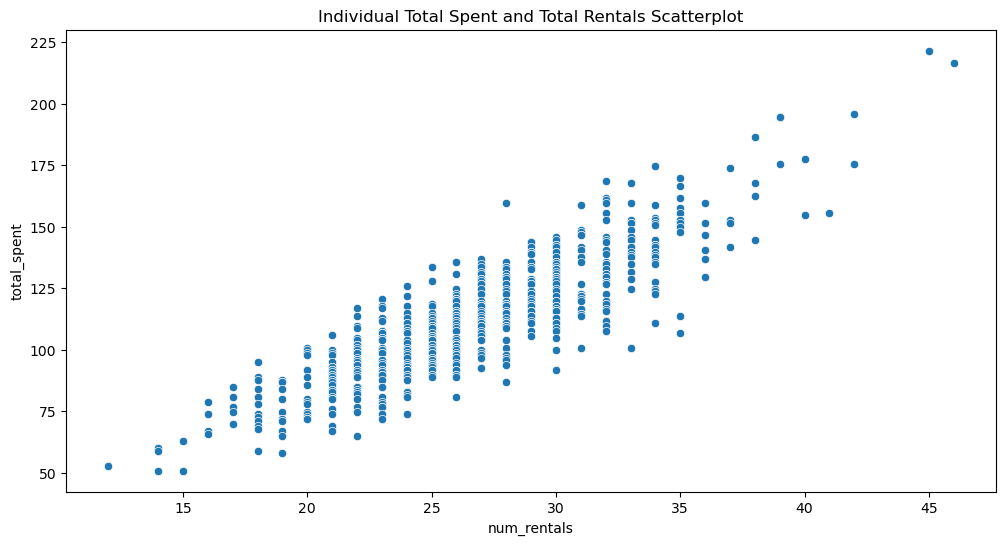

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(y=df_individual_numrentals_total_spending.total_spent, x=df_individual_numrentals_total_spending.num_rentals)
plt.title("Individual Total Spent and Total Rentals Scatterplot")
plt.savefig("TotalSpent_NumberRentals_Scatterplot.jpeg")